In [1]:
# CNN
K.set_image_data_format('channels_first')  # channels_last


NameError: name 'K' is not defined

In [13]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8876807253309446307
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1406107238
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7426477073260040230
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
tf.test.gpu_device_name()

Using TensorFlow backend.


'/device:GPU:0'

In [2]:
batch_size = 128
num_classes = 10
epochs = 12
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

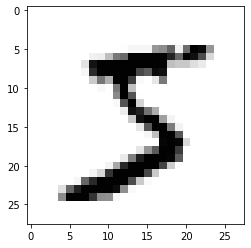

In [3]:
first_image = x_train[0,:,:]
plt.imshow(first_image, cmap = plt.cm.Greys)

In [4]:
# channel_first , channel_last

#x_train = x_train.reshape(x_train.shape[0],1,28,28)
#x_test = x_test.reshape(x_test.shape[0],1,28,28)
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
x_train = x_train.astype('float32')   # 타입 변경 ( 255로 나누기 위해서 )
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape', x_train.shape)
print(x_train.shape[0] , ' train sample')
print(x_test.shape[0], ' test sample')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape (60000, 28, 28, 1)
60000  train sample
10000  test sample


In [6]:
model = Sequential()


# 32 : filter 수  
# 3x3 filter
# 입력데이터 : 128x 28x 28x 1 => (128 x 26 x 26 x 32)
# padding : valid(default)
model.add(Conv2D(32, 3, 3 , activation='relu', input_shape=(28,28,1)))   # activation : relu : 음수 제거 
# 아웃풋 :  128 x 24 x 24 x 64
model.add(Conv2D(64,3,3, activation = 'relu'))
# 128 x 12 x 12 x 64
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# 12 x 12 x 64 가 1차원으로 됨( 9216 )
model.add(Flatten())

# FFNN망 (=FC망)
# input : 128 x 9216
# 가중치 : 9216 x 128
# output : 128 x 128
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))  # 계산회로만 생략

# input : 128 x 128
# 가중치 : 128 x 10
# output : 128 x 10
model.add(Dense(10, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\ICT01_02\Anaconda3\envs\jeju\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
C:\Users\ICT01_02\Anaconda3\envs\jeju\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.Adadelta(),
             metrics = ['accuracy'])

# train,validation //// test
class AccuracyHistory(keras.callbacks.Callback):
    # 오버라이딩 ( 재정의 )
    def on_train_begin(self, logs={}):  # 훈련 시작 시 이벤트 발생
        self.acc =[]
    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))
history = AccuracyHistory()


model.fit(x_train, y_train,
         batch_size = batch_size, epochs = epochs, verbose =1,
         validation_data = (x_test, y_test),
         callbacks = [history])
score = model.evaluate(x_test, y_test, verbose=0)
score[0] # loss값
score[1] # accuracy 값


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 172us/step - loss: 0.2681 - acc: 0.9171 - val_loss: 0.0621 - val_acc: 0.9802
Epoch 2/12
51584/60000 [========================>.....] - ETA: 1s - loss: 0.0903 - acc: 0.9741

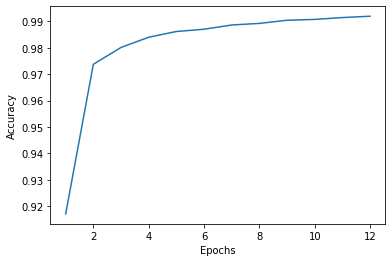

In [9]:
plt.plot(range(1, 13), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [10]:
score[1]

0.9911

In [ ]:
# CNN
K.set_image_data_format('channels_first')  # channels_last


In [7]:
# HDFS( hadoop file system ) : model 구조 전체 저장
# 가중치, 구조, optimization statge 등이 저장
# json으로 저장 가능
#  - 구조와 가중치 별로도 저장 # web에서 tensorflow 사용 가능
model.save("model_mnist.h5")
print("모델이 저장되었습니다. ")
from keras.models import load_model

model = load_model('model_mnist.h5')
print("모델이 로딩되었습니다.")

model.summary()







모델이 저장되었습니다. 
모델이 로딩되었습니다.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)   

C:\Users\ICT01_02\Anaconda3\envs\jeju\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [12]:
l1 = model.layers[0]
l2 = model.layers[1]
print(l1.name)
print(l1.input_shape)
print(l1.activation)
print(l1.output_shape)

conv2d_1
(None, 28, 28, 1)
<function relu at 0x0000024D3C2D0798>
(None, 26, 26, 32)


C:\Users\ICT01_02\Anaconda3\envs\jeju\lib\site-packages\keras_preprocessing\image\image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


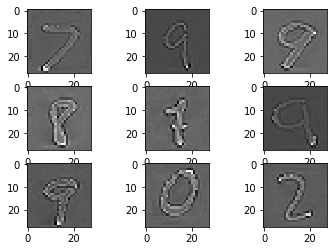

In [8]:
# imageData Generator

from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
(X_train, y_train) ,(X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28 ,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28 ,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#datagen = ImageDataGenerator(horizontal_flip = True, vertical_flip = True)
#datagen = ImageDataGenerator(rotation_range= 90)
#datagen = ImageDataGenerator(width_shift_range =0.2, height_shift_range=0.2) # 좌우, 상하로 이동
datagen = ImageDataGenerator(zca_whitening = True) # 이미지 백색화( noise 제거 -> 변수간 상관도를 없앰 ) == PCA
datagen.fit(X_train)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size = 9
                                     ,save_to_dir='images', save_prefix='aug', save_format='png') :
    for i in range(0,9) :
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28,28),
                     cmap = pyplot.get_cmap('gray'))
    pyplot.show()
    break


X_train shape :  (50000, 32, 32, 3)
50000 Train samples
10000 Test samples


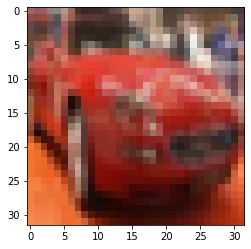

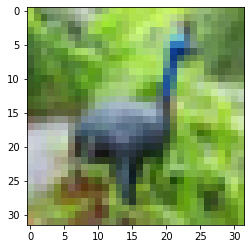

In [11]:
# airplane, automobile, bird ,cat , deer, dog,
# frod, horse, ship, truck 10개로 분류
from keras.datasets import cifar10
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from keras.layers import Activation


(X_train, y_train) , (X_test, y_test) = cifar10.load_data()
print("X_train shape : ", X_train.shape)
print(X_train.shape[0], 'Train samples')
print(X_test.shape[0], 'Test samples')
NB_CLASSES = 10
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

plt.imshow(X_train[5])
plt.grid(False)
plt.show()
plt.imshow(X_train[6])
plt.grid(False)
plt.show()

In [10]:
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32
batch_size = 128
nb_epoch = 40 # 40
nb_classes = 10
verbose = 1
validation_split = 0.2
optimizer = RMSprop()

In [12]:
model = Sequential()
# residual 망의 영향 ( 연속2번 망을 구성- pooling)
# 입력 : 32 x 32 x 3 => 32 x 32 x 32
model.add(Conv2D(32, kernel_size=3, padding='SAME',
                input_shape = (IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32 , kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,3,3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=optimizer,
             metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
__________

C:\Users\ICT01_02\Anaconda3\envs\jeju\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  


In [ ]:
history = model.fit(X_train,y_train, batch_size = batch_size,
                   epochs = epochs, validation_split = validation_split,
                   verbose = verbose)

Train on 40000 samples, validate on 10000 samples
Epoch 1/12
40000/40000 [==============================] - 67s 2ms/step - loss: 1.8133 - acc: 0.3460 - val_loss: 1.3905 - val_acc: 0.4991
Epoch 2/12
40000/40000 [==============================] - 67s 2ms/step - loss: 1.3413 - acc: 0.5247 - val_loss: 1.1224 - val_acc: 0.5974
Epoch 3/12
40000/40000 [==============================] - 66s 2ms/step - loss: 1.1236 - acc: 0.6024 - val_loss: 1.0387 - val_acc: 0.6341
Epoch 4/12
40000/40000 [==============================] - 66s 2ms/step - loss: 0.9877 - acc: 0.6536 - val_loss: 0.9603 - val_acc: 0.6662
Epoch 5/12
40000/40000 [==============================] - 66s 2ms/step - loss: 0.8860 - acc: 0.6921 - val_loss: 0.9293 - val_acc: 0.6870
Epoch 6/12
40000/40000 [==============================] - 66s 2ms/step - loss: 0.8097 - acc: 0.7195 - val_loss: 0.8062 - val_acc: 0.7229
Epoch 7/12
36352/40000 [==========================>...] - ETA: 5s - loss: 0.7504 - acc: 0.7397

In [21]:
datagem = ImageDataGenerator(
    featurewise_center= False,
    samplewise_center = False,
    featurewise_std_normalization = False,
    samplewise_std_normalization = False,
    zca_whitening = False,
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip = True,
    vertical_flip = False)
datagen.fit(X_train)

In [ ]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                   samples_per_epoch = X_train.shape[0],
                   nb_epoch = nb_epoch,
                   verbose = verbose)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


C:\Users\ICT01_02\Anaconda3\envs\jeju\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
C:\Users\ICT01_02\Anaconda3\envs\jeju\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., verbose=1, steps_per_epoch=390, epochs=40)`
  after removing the cwd from sys.path.




Epoch 1/40
390/390 [==============================] - 72s 185ms/step - loss: 1.6828 - acc: 0.40043s - loss: 1.7 - ETA: 0s - loss: 1.6838 - acc: 0.399
Epoch 2/40
390/390 [==============================] - 72s 184ms/step - loss: 1.1129 - acc: 0.6190
Epoch 3/40
390/390 [==============================] - 70s 179ms/step - loss: 0.9252 - acc: 0.6803
Epoch 4/40
390/390 [==============================] - 71s 183ms/step - loss: 0.8099 - acc: 0.7194
Epoch 5/40
295/390 [=====================>........] - ETA: 17s - loss: 0.7392 - acc: 0.7445

In [11]:
score = model.evaluate(X_test, y_test,
                      batch_size = batch_size, verbose= verbose)
print("\nTest score : ", score[0])
print("\nTest accuracy : ", score[1])

10000/10000 [==============================] - 5s 506us/step

Test score :  3.781816278076172

Test accuracy :  0.118


In [11]:
#json으로 저장
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite = True)

In [20]:
# json으로 load
from keras.models import model_from_json
json_file = open('cifar10_architecture.json','r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('cifar10_weights.h5')
print("Loaded model from disk")

None
Loaded model from disk


In [31]:
loaded_model.compile(loss="categorical_crossentropy", optimizer="RMSprop", metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose = 1)


10000/10000 [==============================] - 1s 120us/step


In [33]:
print(score[0])
print(score[1])

0.7015

In [34]:

# 1. accuracy graph를 출력
# 2. 이미지 cat, dog를 다운로드한 다음 위의 모델로 예측

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

NameError: name 'history' is not defined

In [37]:
import numpy as np
from imageio import imread
from skimage.transform import resize
from keras.models import model_from_json
img_names = ['cat.jpg', 'dog.jpg']
imgs = [resize(imread(img_name), (32, 32)).astype('float32') for img_name in img_names]
imgs = np.array(imgs)/ 255
predictions = model.predict_classes(imgs)
print(predictions)

[7 7]


In [ ]:
# 전이 (transfer learning) 학습 Application
# - 반지도학습( 일부데이터의 레이블이 없음 ) - KNN, Trenductive SVM
# - 가중치 활용 : 그대로 적용
# - 가중치 중 일부만 활용
# - FFNN 부분만 학습해서 사용

In [ ]:
# pre-trained , fine-tuning ( FFNN 부분만 Domin Knowledge) => 가중치는 그대로
# 

PIL image size :  (224, 224)


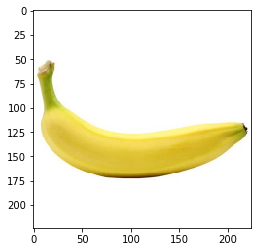

numpy array size :  (224, 224, 3)
image batch size :  (1, 224, 224, 3)
[[('n07753592', 'banana', 0.9996687), ('n03825788', 'nipple', 4.872293e-05), ('n03532672', 'hook', 3.439889e-05)]]


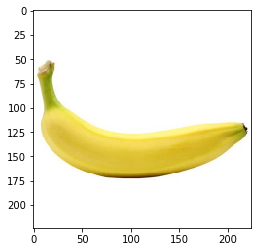

In [43]:
import PIL
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.applications import resnet50

filename = 'banana.jpg'
original = load_img(filename, target_size = (224,224))
print("PIL image size : ", original.size)
plt.imshow(original)
plt.show()

numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
print("numpy array size : ", numpy_image.shape)
# expand_dim 차원확대 : 이미지 여러 장 처리가 전재조건 - banana.jpg 한장이므로 3차원을 4차원으로 확장하기 위함
image_batch = np.expand_dims(numpy_image , axis = 0)
print("image batch size : ", image_batch.shape)
#prepare the image for the resnet50 model
processed_image = resnet50.preprocess_input(image_batch.copy())
# 기존 : dense를 이용해서 모델을 생성
# 이미 만들어진 망을 사용할 수 있음
resnet_model = resnet50.ResNet50(weights = 'imagenet')  # weight ( imagenet을 만들때 사용하던 데이터 중 바나나가 있음 )
# predict : softmax로 확률값으로 나옴 
predictions = resnet_model.predict(processed_image)
label = decode_predictions(predictions, top=3)  # labelling
print(label)

In [61]:
from numpy.random import randn
import pathlib
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from matplotlib.image import imread
from keras.preprocessing import image
#tf.enable_eager_execution()
autotune = tf.data.experimental.AUTOTUNE
data_dir = 'C:/Workpython/전달/flowers/flower_photos'
data_dir = pathlib.Path(data_dir)
print(data_dir)
label_names = {'daisy' : 0, 'dandelion' : 1, 'roses':2,
              'sunflowers':3, 'tulips':4}
label_key = ['daisy','dandelion','roses','sunflowers','tulips']


C:\Workpython\전달\flowers\flower_photos


In [62]:
all_images = list(data_dir.glob('*/*'))  # 파일명 로딩
all_images = [str(path) for path in all_images] 
random.shuffle(all_images)
all_labels = [label_names[pathlib.Path(path).parent.name] for path in all_images]
data_size = len(all_images)
train_test_split = (int)(data_size*0.2)
x_train = all_images[train_test_split:]
x_test = all_images[:train_test_split]
y_train = all_labels[train_test_split:]
y_test = all_labels[:train_test_split]
img_size = 160
batch_size = 32

In [63]:
def _parse_data(x,y):
    image = tf.read_file(x)  # 파일에는 헤더파일 ( 압축 방법 )
    image = tf.image.decode_jpeg(image, channels=3) # 컬러
    image = tf.cast(image, tf.float32)
    image = (image/127.5) -1 # 0~2  -1  ==> -1 ~ 1
    
    # 이미지 사이즈를 통일 
    image = tf.image.resize(image, (img_size, img_size))
    return image, y

def _input_fn(x,y) :
    
    # tensor_slice : 데이터를 기본 단위 요소로 분해
    ds = tf.data.Dataset.from_tensor_slices((x,y)) # dataset을 생성
    
    ds = ds.map(_parse_data) # 함수를 적용 
    
    # buffer : 거쳐가는 기억공간
    ds = ds.shuffle(buffer_size = data_size) # 층븐힌 공간확보
    ds = ds.repeat() # 데이터가 부족하면 처음부터 다시 실행
    ds = ds.batch(batch_size) # minibatch_size
    
    # 자동으로 몇개의 데이터를 읽을지 결정
    # 학습은 batch_size로 하는데, 메모리에 얼마나 남겨놓을지 결정
    ds = ds.prefetch(buffer_size = autotune)
    return ds

train_ds = _input_fn(x_train, y_train)
validation_ds = _input_fn(x_test, y_test)

In [64]:
img_shape = (img_size , img_size, 3)
# include_top = False인 경우 input_shape = img_size 지정 필요
# conv에 대한 가중치 학습이 없음
VGG16_MODEL = tf.keras.applications.VGG16(input_shape = img_shape,
                                         include_top = False,
                                         weights = 'imagenet')



In [65]:
VGG16_MODEL.trainable=False
# flatten이 없음 ( globalaveragepooling으로 대체 )
#  ==> 가중치가 필요없음
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

# FFNN의 가중치는 학습됨
prediction_layer = tf.keras.layers.Dense(len(label_names),
                                         activation ='softmax' )

model = tf.keras.Sequential([
    VGG16_MODEL,
    global_average_layer,
    prediction_layer
])
# model : vgg16이 갖고있는 가중치 + FFNN 가중치로 학습

In [66]:
#sparse : 희소 
# 분류가 아주 많을 때 사용( ex)마트에서 물품 1개 )
model.compile(optimizer = tf.train.AdamOptimizer(),
             loss = tf.keras.losses.sparse_categorical_crossentropy,
             metrics=['accuracy'])

In [67]:
history = model.fit(train_ds, epochs=100, steps_per_epoch=2,
                   validation_steps=2)

Epoch 1/100
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
2/2 [==============================] - 12s 6s/step - loss: 1.7645 - acc: 0.1875
Epoch 2/100
2/2 [==============================] - 0s 192ms/step - loss: 1.6845 - acc: 0.1719
Epoch 3/100
2/2 [==============================] - 0s 184ms/step - loss: 1.5813 - acc: 0.2031
Epoch 4/100
2/2 [==============================] - 0s 189ms/step - loss: 1.5900 - acc: 0.2031
Epoch 5/100
2/2 [==============================] - 0s 181ms/step - loss: 1.5216 - acc: 0.2812
Epoch 6/100
2/2 [==============================] - 0s 192ms/step - loss: 1.5497 - acc: 0.2656
Epoch 7/100
2/2 [==============================] - 0s 181ms/step - loss: 1.5589 - acc: 0.2656
Epoch 8/100
2/2 [==============================] - 0s 185ms/step - loss: 1.5309 - acc: 0.2969
Epoch 9/100
2/2 [==============================] - 0s 184ms/step - loss: 1.4807 - acc: 0.3594
Epoch 10/100
2/2 [==============================] - 0s 191ms/s

KeyError: 'val_acc'

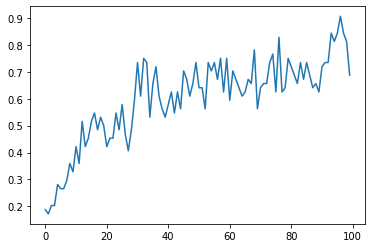

In [68]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()